#                                      SMS CLASSIFIER

 To Develop a Model for SMS CLASSIFIER , we need to perform Dataprocessing and Model Building steps
 

 Used Five Different algorithms to Develop a model they are :

     

1.Naive Bayes

2.Random Forest Classifier

3.Kneigbours classifier

4.Support Vector Classifier  

5.Logistic Regression
    

# Dataprocessing

# Importing Libraries

In [91]:
#importing required libraries for dataprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import warnings
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Loading Spam Dataset

In [92]:
#loading data
data=pd.read_csv(r'C:\Users\srira\OneDrive\Desktop\BHARAT INTERN\Spam-Dataset.csv',encoding='latin1')

In [93]:
#featuring the info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [94]:
#first 5 values in data
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [95]:
#dropping unneccessary columns 
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
#renaming columns
data=data.rename(columns={'v1':'Categories','v2':'Message'})

In [96]:
#showing last 5 values in data
data.tail()

,Categories,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [97]:
#shape of the data
data.shape

(5572, 2)

In [98]:
#to filterout the warnings
warnings.filterwarnings("ignore")

In [99]:
#value counts of categories column
data['Categories'].value_counts()

Categories
ham     4825
spam     747
Name: count, dtype: int64

Text(0, 0.5, 'Count')

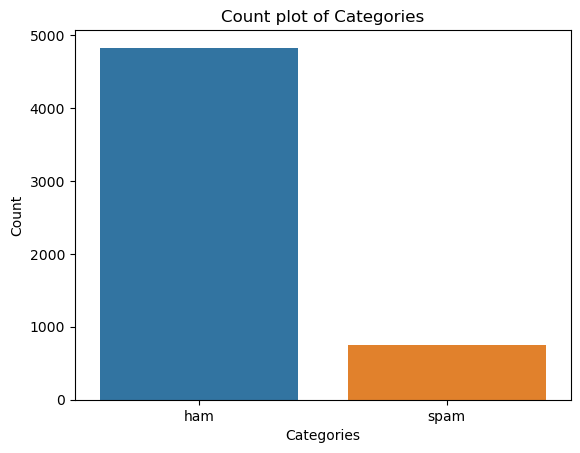

In [100]:
#plotting category values 
plot=sns.countplot(x=data['Categories'])
plot.set_title('Count plot of Categories')
plot.set_xlabel('Categories')
plot.set_ylabel('Count')

# Feature Engineering

In [101]:
#finding no of characters,words,sentences
#adding extra features to data for better data exploration

data ['No_of_Characters'] = data['Message'].apply(len)

def count_words(message):
    # Split the message into words based on whitespace
    words = message.split()
    # Remove punctuation from each word
    words = [word.strip(string.punctuation) for word in words]
    # Filter out empty strings (resulting from multiple consecutive whitespaces)
    words = [word for word in words if word]
    return len(words)

def count_sentences(message):
    # Split the message into sentences based on common sentence-ending punctuation
    sentences = [sentence.strip() for sentence in re.split(r'[.!?]', message)]
    # Filter out empty strings (resulting from multiple consecutive punctuation marks)
    sentences = [sentence for sentence in sentences if sentence]
    return len(sentences)

data['No_of_Words'] = data['Message'].apply(count_words)
data['No_of_Sentences'] = data['Message'].apply(count_sentences)

In [102]:
#viewing statistics of data on adding features
data.describe()

,No_of_Characters,No_of_Words,No_of_Sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,15.274228,2.345118
std,59.690841,11.082619,1.705332
min,2.000000,0.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,61.000000,12.000000,2.000000
75%,121.000000,22.000000,3.000000
max,910.000000,171.000000,31.000000


In [103]:
#data after adding extra features
data

,Categories,Message,No_of_Characters,No_of_Words,No_of_Sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,3
1,ham,Ok lar... Joking wif u oni...,29,6,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,ham,U dun say so early hor... U c already then say...,49,11,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,30,5
5568,ham,Will Ì_ b going to esplanade fr home?,37,8,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,9,3
5570,ham,The guy did some bitching but I acted like i'd...,125,26,1


# Outlier Detection

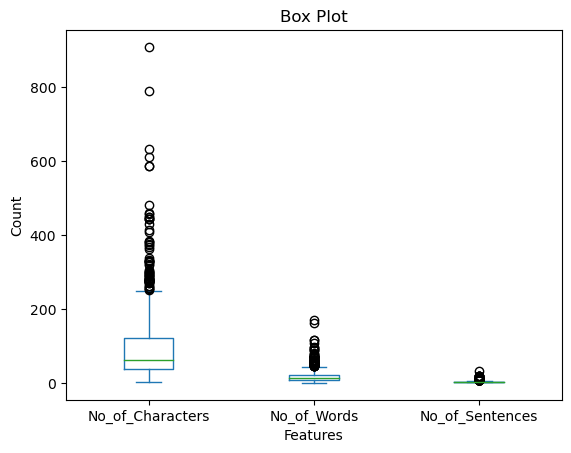

In [104]:
#detecting outliers using box plot
data.plot.box()
plt.title('Box Plot')
plt.xlabel('Features')
plt.ylabel('Count')
plt.show()

In [105]:
#dropping outliers
#reducing outliers by limiting to certain characters
data = data[(data['No_of_Characters']<400)]
data.shape

(5555, 5)

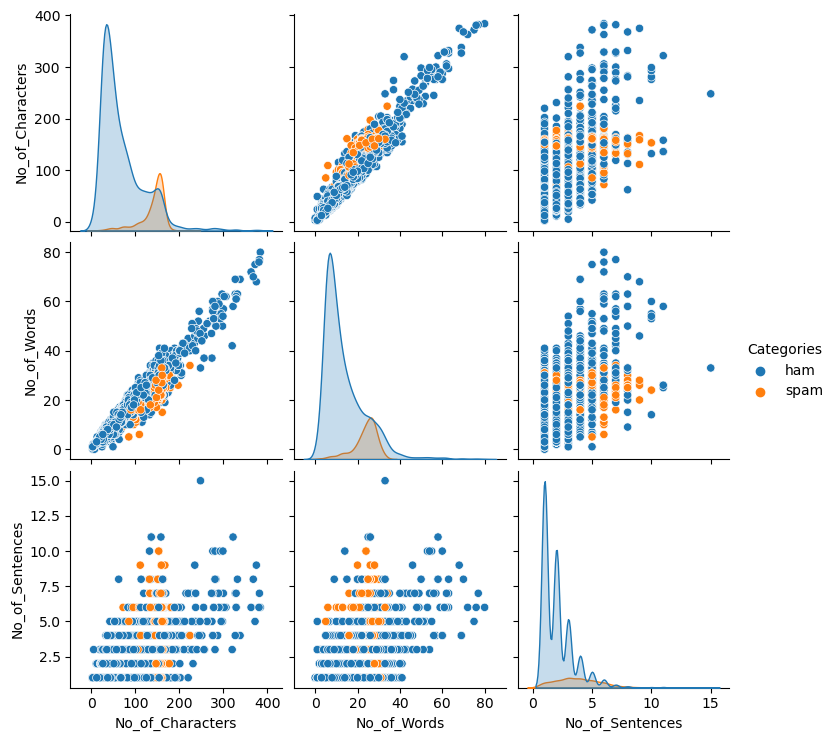

In [106]:
#plotting data after dropping outliers
fig = sns.pairplot(data=data, hue="Categories")

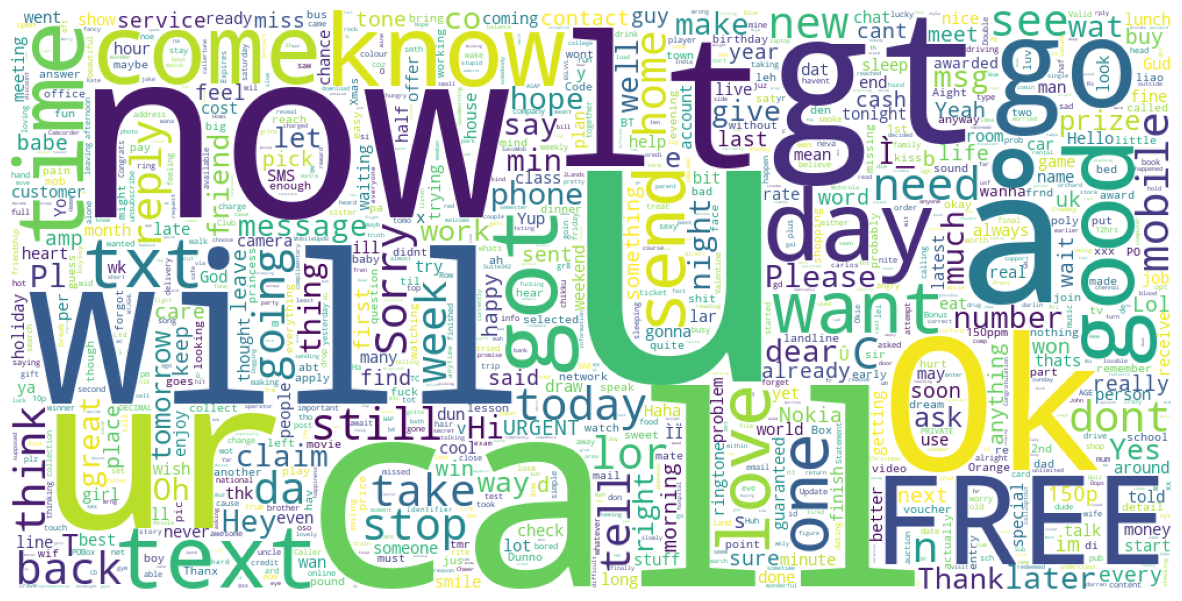

In [107]:
#visualising words in data by wordcloud before datapreprocessing
from wordcloud import WordCloud

text= " ".join(i for i in data.Message)
wc=WordCloud(background_color="white",width=1000,height=500,max_words=1000,collocations=False,min_font_size=1)
wc.generate(text)

plt.figure(figsize=[15,8])
plt.imshow(wc)
plt.axis('off')
plt.show()

# Data Preprocessing

In [108]:
#printing few messages
print("The First message:")
print(data['Message'][0])

The First message:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


# Cleaning the message

In [109]:
#cleaning the message for preprocessing
def Clean(message):
    sms=re.sub('[^a-zA-Z]',' ' ,message)
    sms = sms.lower()
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

data['Clean_Text'] = data['Message'].apply(Clean)
print('The First message after cleaning:')
print(data['Clean_Text'][0])

The First message after cleaning:
go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat


# Tokenization

In [110]:
#converting message into tokens
data["Tokenized"]=data.apply(lambda row:nltk.word_tokenize(row["Clean_Text"]),axis=1)

print("The First message after tokenization:")
print(data['Tokenized'][0])

The First message after tokenization:
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']


# Removing stopwords

In [111]:
#filtering out the stopwords from message
def remove_stopwords(message):
    stop_words=set(stopwords.words("english"))
    filtered_text=[word for word in message if word not in stop_words]
    return filtered_text

data["NonStopWords_Text"]=data["Tokenized"].apply(remove_stopwords)
print("The First message after removing stopwords:")
print(data["NonStopWords_Text"][0])

The First message after removing stopwords:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']


# Stemming

In [112]:
#reducing words to root form 
stemmer = PorterStemmer()

def stem_words(message):
    stemmed_words = [stemmer.stem(word) for word in message]
    return stemmed_words

data["Stemmed"] = data["NonStopWords_Text"].apply(stem_words)

print("The First message after Stemming:")
print(data["Stemmed"][0])

The First message after Stemming:
['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']


In [113]:
#joining the text after stemming
corpus= []
for i in data["Stemmed"]:
    msg=' '.join([row for row in i])
    corpus.append(msg)

print("The First 3 lines in corpus:")
print(corpus[:3])

#adding this corpus to the dataframe
data['Final_Message']=corpus

The First 3 lines in corpus:
['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli']


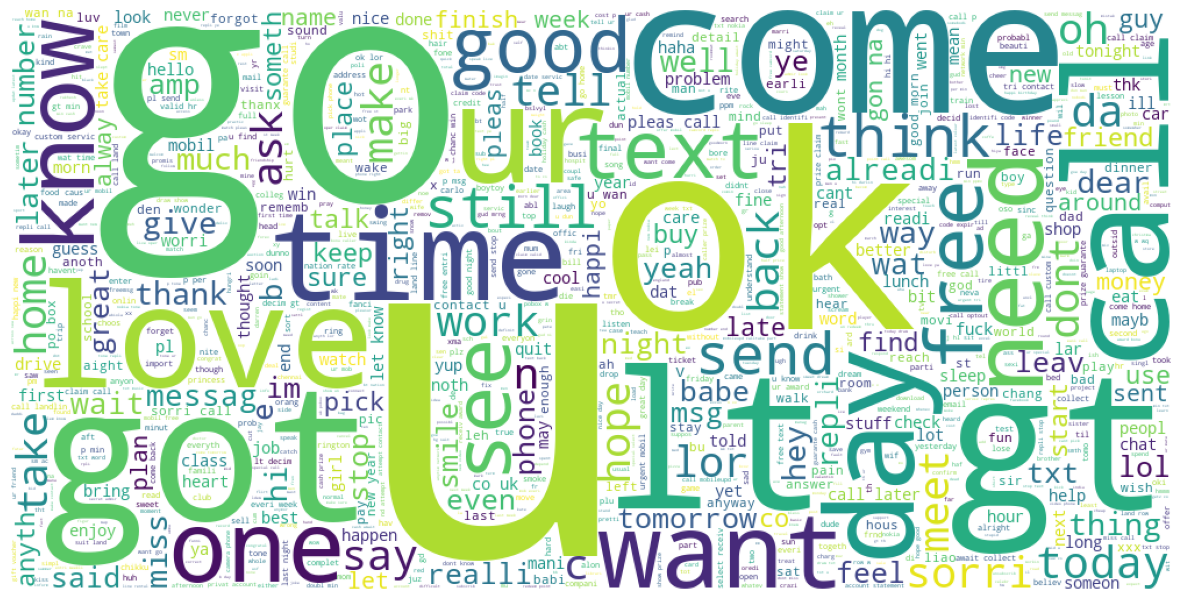

In [114]:
#visualising words by wordcloud after data preprocessing
from wordcloud import WordCloud

text= " ".join(i for i in corpus)
wc=WordCloud(background_color="white",width=1000,height=500,max_words=1000,collocations=True,min_font_size=1)
wc.generate(text)

plt.figure(figsize=[15,8])
plt.imshow(wc)
plt.axis('off')
plt.show()

In [115]:
#Final dataframe after adding all the features and performing data preprocessing
data.head()

,Categories,Message,No_of_Characters,No_of_Words,No_of_Sentences,Clean_Text,Tokenized,NonStopWords_Text,Stemmed,Final_Message
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,3,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,6,2,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entri, wkli, comp, win, fa, cup, final,...",free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,49,11,2,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]","[nah, think, goe, usf, live, around, though]",nah think goe usf live around though


# Vectorizing The Data

In [116]:
#Changing Categorical data into Numerical data

vector = TfidfVectorizer()
X = vector.fit_transform(corpus).toarray()

#Type of X we have is 
X.dtype

dtype('float64')

In [117]:
#using label encoding converting categories to numerical data

label_encoder = LabelEncoder()
data["Categories"] = label_encoder.fit_transform(data["Categories"])

In [118]:
#our categorical messages are now converted to numerical form  
data["Categories"]

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Categories, Length: 5555, dtype: int32

# Model Building

In [119]:
#importing required libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [120]:
#splitting data into train and test sets
Y=data["Categories"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [121]:
#defining functions for scoring of model,confusion matrix,classification report

def model_score(model):
    print('\nTraining Score :',model.score(X_train,Y_train)) 
    print('\nTesting Score  :',model.score(X_test,Y_test))     
    
def model_eval(ytest,ypred):
    c_m = confusion_matrix(ytest,ypred)
    c_r = classification_report(ytest,ypred)
    print('\nConfusion Matrix\n',c_m)
    print('\nClassification Report\n',c_r)

# 1.Naive Bayes Model

In [122]:
#Building model using Naive Bayes algorithm

NB = MultinomialNB()
NB.fit(X_train,Y_train)

#predicting using Naive bayes

NB_P=NB.predict(X_test)

#computing model training and testing score
model_score(NB)


Training Score : 0.9761476147614762

Testing Score  : 0.9675967596759676


In [123]:
# Evaluating using confusion matrix ,classification report,accuracy score

model_eval(Y_test,NB_P)

#printing the accuracy score 

NB_ACC = accuracy_score(Y_test,NB_P)
print('Accuracy Score :',NB_ACC)


Confusion Matrix
 [[950   1]
 [ 35 125]]

Classification Report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       951
           1       0.99      0.78      0.87       160

    accuracy                           0.97      1111
   macro avg       0.98      0.89      0.93      1111
weighted avg       0.97      0.97      0.97      1111

Accuracy Score : 0.9675967596759676


# 2.Random Forest Classifier Model 

In [124]:
#Building model using Random Forest Classifier algorithm

RF = RandomForestClassifier()
RF.fit(X_train,Y_train)

#predicting using Random Forest Classifier

RF_P=RF.predict(X_test)

#computing model training and testing score
model_score(RF)


Training Score : 1.0

Testing Score  : 0.9783978397839784


In [125]:
# Evaluating using confusion matrix ,classification report,accuracy score

model_eval(Y_test,RF_P)

#printing the accuracy score 

RF_ACC = accuracy_score(Y_test,RF_P)
print('Accuracy Score :',RF_ACC)


Confusion Matrix
 [[951   0]
 [ 24 136]]

Classification Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       951
           1       1.00      0.85      0.92       160

    accuracy                           0.98      1111
   macro avg       0.99      0.93      0.95      1111
weighted avg       0.98      0.98      0.98      1111

Accuracy Score : 0.9783978397839784


# 3.K Neighbors Classifier Model

In [126]:
#Building model using K Neighbors Classifier algorithm

KN = KNeighborsClassifier()
KN.fit(X_train,Y_train)

#predicting using K Neighbors Classifier

KN_P=KN.predict(X_test)

#computing model training and testing score
model_score(KN)


Training Score : 0.9252925292529253

Testing Score  : 0.9153915391539154


In [127]:
# Evaluating using confusion matrix ,classification report,accuracy score

model_eval(Y_test,KN_P)

#printing the accuracy score 

KN_ACC = accuracy_score(Y_test,KN_P)
print('Accuracy Score :',KN_ACC)


Confusion Matrix
 [[951   0]
 [ 94  66]]

Classification Report
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       951
           1       1.00      0.41      0.58       160

    accuracy                           0.92      1111
   macro avg       0.96      0.71      0.77      1111
weighted avg       0.92      0.92      0.90      1111

Accuracy Score : 0.9153915391539154


# 4. Support Vector Classifier Model

In [128]:
#Building model using Support Vector Classifier algorithm

SV = SVC()
SV.fit(X_train,Y_train)

#predicting using Support Vector Classifier

SV_P=SV.predict(X_test)

#computing model training and testing score
model_score(SV)


Training Score : 0.9972997299729973

Testing Score  : 0.981998199819982


In [129]:
# Evaluating using confusion matrix ,classification report,accuracy score

model_eval(Y_test,SV_P)

#printing the accuracy score 

SV_ACC = accuracy_score(Y_test,SV_P)
print('Accuracy Score :',SV_ACC)


Confusion Matrix
 [[951   0]
 [ 20 140]]

Classification Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       951
           1       1.00      0.88      0.93       160

    accuracy                           0.98      1111
   macro avg       0.99      0.94      0.96      1111
weighted avg       0.98      0.98      0.98      1111

Accuracy Score : 0.981998199819982


# 5.Logistic Regression Model

In [130]:
#Building model using Support Vector Classifier algorithm

LR = LogisticRegression()
LR.fit(X_train,Y_train)

#predicting using Support Vector Classifier

LR_P=LR.predict(X_test)

#computing model training and testing score
model_score(LR)


Training Score : 0.9725472547254725

Testing Score  : 0.9594959495949595


In [131]:
# Evaluating using confusion matrix ,classification report,accuracy score

model_eval(Y_test,LR_P)

#printing the accuracy score 

LR_ACC = accuracy_score(Y_test,LR_P)
print('Accuracy Score :',LR_ACC)


Confusion Matrix
 [[950   1]
 [ 44 116]]

Classification Report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       951
           1       0.99      0.72      0.84       160

    accuracy                           0.96      1111
   macro avg       0.97      0.86      0.91      1111
weighted avg       0.96      0.96      0.96      1111

Accuracy Score : 0.9594959495949595


In [132]:
#Evaluating accuracy scores of all the models

ACC={'MODEL':['Naive Bayes','Random Forest','K Neighbors','Support Vector','Logistic Regression'],'ACC_SCORES':[NB_ACC,RF_ACC,KN_ACC,SV_ACC,LR_ACC]}

#creating a dataframe of accuracy scores

ACC_D=pd.DataFrame(data=ACC,index=[1,2,3,4,5])

#printing the dataframe

print("\nDataFrame of Accuracy Scores:")
display(ACC_D)


DataFrame of Accuracy Scores:


,MODEL,ACC_SCORES
1,Naive Bayes,0.967597
2,Random Forest,0.978398
3,K Neighbors,0.915392
4,Support Vector,0.981998
5,Logistic Regression,0.959496


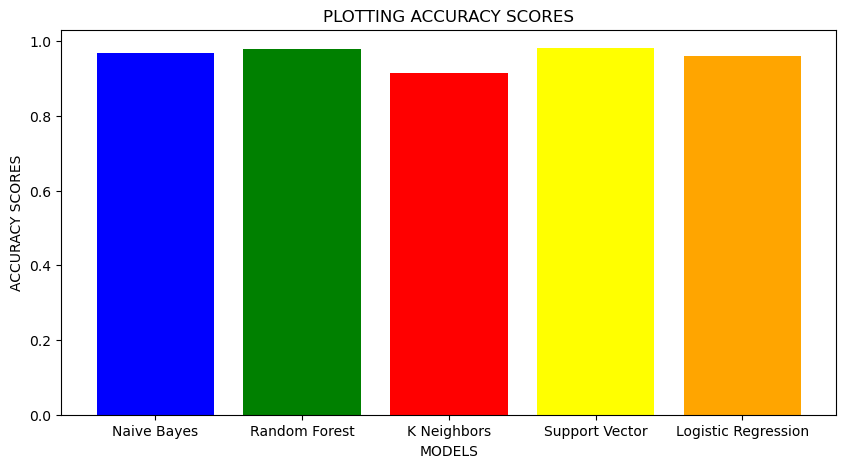

In [133]:
#plotting accuracy scores using matplotlib

plt.figure(figsize=(10,5))
colors = ["blue", "green", "red", "yellow","orange","purple"]
plt.bar(ACC_D['MODEL'],ACC_D['ACC_SCORES'],color=colors)
plt.title('PLOTTING ACCURACY SCORES')
plt.xlabel('MODELS')
plt.ylabel('ACCURACY SCORES')
plt.show()

Support Vector Classifier model got the highest accuracy

Observations from Dataframe and Barplot

1.Support Vector has the highest accuracy : 0.981998

2.Random Forest Classifier got the second highest accuracy : 0.978398 

# So, finally I'm using Support Vector Classifier Model for SMS Classifier

In [134]:
#storing vectorized content and model data into pickle file for future purpose
import pickle
pickle.dump(vector,open('vector.pkl','wb'))
pickle.dump(SV,open('model.pkl','wb'))

In [137]:
#for running the app.py file and depoly the model using streamlit locally

!streamlit run app.py

^C


                                         Thank You!!!